This program will use the loaded data to analyze for insights. The analysis will be performed on unique customers to understand the population's preferences.

- [Import modules](#1)
- [Load data](#2)
- [EDA - Exploratory Data Analysis](#3)
    - [Customers](#3.1)
    - [Transactions](#3.2)

### <a id="1"></a>Import modules

In [1]:
# Import modules for the defined functions needed
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Defined functions in the functions.py script
import functions

In [2]:
# Directory for the project (under LS Direct folder)
mainDir = "../LS Direct/"
loadedDataPath = mainDir + "Loaded_Data/"

In [3]:
# List of files in loadedDataPath
os.listdir(loadedDataPath)

['Customers.csv',
 'Customer_Transactions.xlsx',
 'payload_files_directory.csv',
 'Transactions.csv']

### <a id="2"></a>Load data

In [4]:
# Loading the joined Customer Transactions table
Customer_Transactions = pd.read_excel(loadedDataPath + "Customer_Transactions.xlsx")
Customer_Transactions.shape

(536885, 15)

In [5]:
Customer_Transactions.head()

,Customer_ID,First Name,Last Name,Address,City,State_Abbr,Zip,Start_Date,Date,Transaction_ID,Department,Category,SKU,Price,Discount
0,C84725947570,Elizabeth,Jones,947 James Greens,Scottland,PR,603.0,2022-01-01,2022-01-01,343404242996,Women,Bottoms,Leggings,28.77,2.52
1,C84725947570,Elizabeth,Jones,947 James Greens,Scottland,PR,603.0,2022-01-01,2022-01-01,343404242996,Women,Bottoms,Wide-Leg Pants,37.77,3.30
2,C84725947570,Elizabeth,Jones,947 James Greens,Scottland,PR,603.0,2022-01-01,2022-01-01,343404242996,Women,Tops,Hoodie,40.77,3.57
3,C84725947570,Elizabeth,Jones,947 James Greens,Scottland,PR,603.0,2022-01-01,2022-01-01,343404242996,Women,Bottoms,Jeans,29.77,2.60
4,C97761921457,Taylor,Bennett,2980 Salas Springs Apt. 814,Sanchezbury,NE,68040.0,2022-01-01,2022-01-01,693925612590,Women,Tops,Hoodie,40.77,3.57


In [6]:
# Data type and size
Customer_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536885 entries, 0 to 536884
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Customer_ID     536885 non-null  object 
 1   First Name      536885 non-null  object 
 2   Last Name       536885 non-null  object 
 3   Address         409097 non-null  object 
 4   City            409097 non-null  object 
 5   State_Abbr      409097 non-null  object 
 6   Zip             409097 non-null  float64
 7   Start_Date      536885 non-null  object 
 8   Date            536885 non-null  object 
 9   Transaction_ID  536885 non-null  int64  
 10  Department      536885 non-null  object 
 11  Category        536885 non-null  object 
 12  SKU             536885 non-null  object 
 13  Price           536885 non-null  float64
 14  Discount        22705 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 61.4+ MB


In [7]:
# Missing data in columns
Customer_Transactions.isnull().sum()

Customer_ID            0
First Name             0
Last Name              0
Address           127788
City              127788
State_Abbr        127788
Zip               127788
Start_Date             0
Date                   0
Transaction_ID         0
Department             0
Category               0
SKU                    0
Price                  0
Discount          514180
dtype: int64

In [8]:
# Calculating percentage of the missing values
Missing_Perc = Customer_Transactions.isnull().sum() * 100 / len(Customer_Transactions)
missing_value = pd.DataFrame({'Column': Customer_Transactions.columns,
                              'Missing_Perc': Missing_Perc})
missing_value

,Column,Missing_Perc
Customer_ID,Customer_ID,0.000000
First Name,First Name,0.000000
Last Name,Last Name,0.000000
Address,Address,23.801745
City,City,23.801745
State_Abbr,State_Abbr,23.801745
Zip,Zip,23.801745
Start_Date,Start_Date,0.000000
Date,Date,0.000000
Transaction_ID,Transaction_ID,0.000000


### <a id="3"></a>EDA - Exploratory Data Analysis

array([[<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'Transaction_ID'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Discount'}>]], dtype=object)

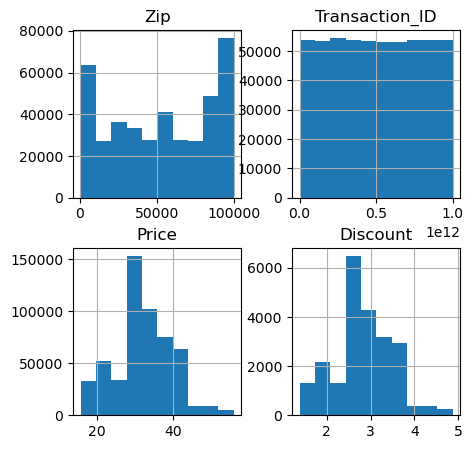

In [9]:
# Histogram for all the variables
Customer_Transactions.hist(bins=10, figsize=(5,5))

<Axes: >

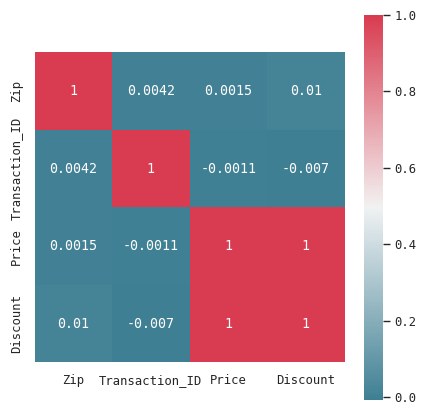

In [10]:
# Correlation between the numeric variables
sns.set(context="paper",font="monospace")
Customer_Transactions_numeric = Customer_Transactions.select_dtypes(include=["int64","float64"])
corr_matrix = Customer_Transactions_numeric.corr()
fig, axe = plt.subplots(figsize=(5,5))
cmap = sns.diverging_palette(220,8,center = "light", as_cmap=True) #color palettes
sns.heatmap(corr_matrix,vmax=1,square =True, cmap=cmap,annot=True ) #draw heatmap

In [11]:
Customer_Transactions.columns

Index(['Customer_ID', 'First Name', 'Last Name', 'Address', 'City',
       'State_Abbr', 'Zip', 'Start_Date', 'Date', 'Transaction_ID',
       'Department', 'Category', 'SKU', 'Price', 'Discount'],
      dtype='object')

### <a id="3.1"></a>Customers

In [12]:
# Unique customers grouped by each state
Customers_by_State = Customer_Transactions.groupby('State_Abbr')['Customer_ID'].nunique().sort_values(ascending=False).reset_index(name='Customer_Cnt')
Customers_by_State

,State_Abbr,Customer_Cnt
0,AS,2177
1,IN,2149
2,NY,2147
3,CT,2132
4,AK,2130
5,UT,2127
6,CO,2125
7,RI,2124
8,NV,2120
9,ND,2119


In [13]:
# Unique customers grouped by each department
Customers_by_Department = Customer_Transactions.groupby(['Department'])['Customer_ID'].nunique().sort_values(ascending=False).reset_index(name='Customer_Cnt')
Customers_by_Department

,Department,Customer_Cnt
0,Women,79567
1,Men,78816


In [14]:
# Unique customers grouped by each category
Customers_by_Category = Customer_Transactions.groupby(['Category'])['Customer_ID'].nunique().sort_values(ascending=False).reset_index(name='Customer_Cnt')
Customers_by_Category

,Category,Customer_Cnt
0,Bottoms,145812
1,Tops,73446
2,Shirts,72635


In [15]:
# Unique customers grouped by each stock keeping unit
Customers_by_SKU = Customer_Transactions.groupby(['SKU'])['Customer_ID'].nunique().sort_values(ascending=False).reset_index(name='Customer_Cnt')
Customers_by_SKU

,SKU,Customer_Cnt
0,Jeans,48364
1,Crew Neck Shirt,29337
2,Chinos,26803
3,Joggers,26688
4,Jeggings,21912
5,Leggings,21809
6,Wide-Leg Pants,21784
7,Hoodie,18679
8,Sweater,18667
9,Blouse,16109


In [16]:
# Extracting Year, Month, Day from Date
Customer_Transactions['Year'] = Customer_Transactions['Date'].apply(lambda x: int(x[0:4]))
Customer_Transactions['Month'] = Customer_Transactions['Date'].apply(lambda x: int(x[5:7]))
Customer_Transactions['Day'] = Customer_Transactions['Date'].apply(lambda x: int(x[8:10]))

In [17]:
# Aggregate the numeric columns by the Year
Customer_Transactions_Year = Customer_Transactions.select_dtypes(include=np.number).groupby(['Year']).mean()
Customer_Transactions_Year.head()

,Zip,Transaction_ID,Price,Discount,Month,Day
Year,,,,,,
2022,53127.670891,5.004099e+11,32.015002,2.824937,6.602677,15.675304
2023,53442.400491,4.987951e+11,31.643858,2.780361,5.398319,15.683446
2024,57805.200000,4.584925e+11,31.990721,NaN,6.346847,16.090090
2025,51899.532051,4.947687e+11,30.584286,NaN,6.457143,15.290476
2026,51078.687500,5.701511e+11,28.875263,NaN,2.473684,11.947368


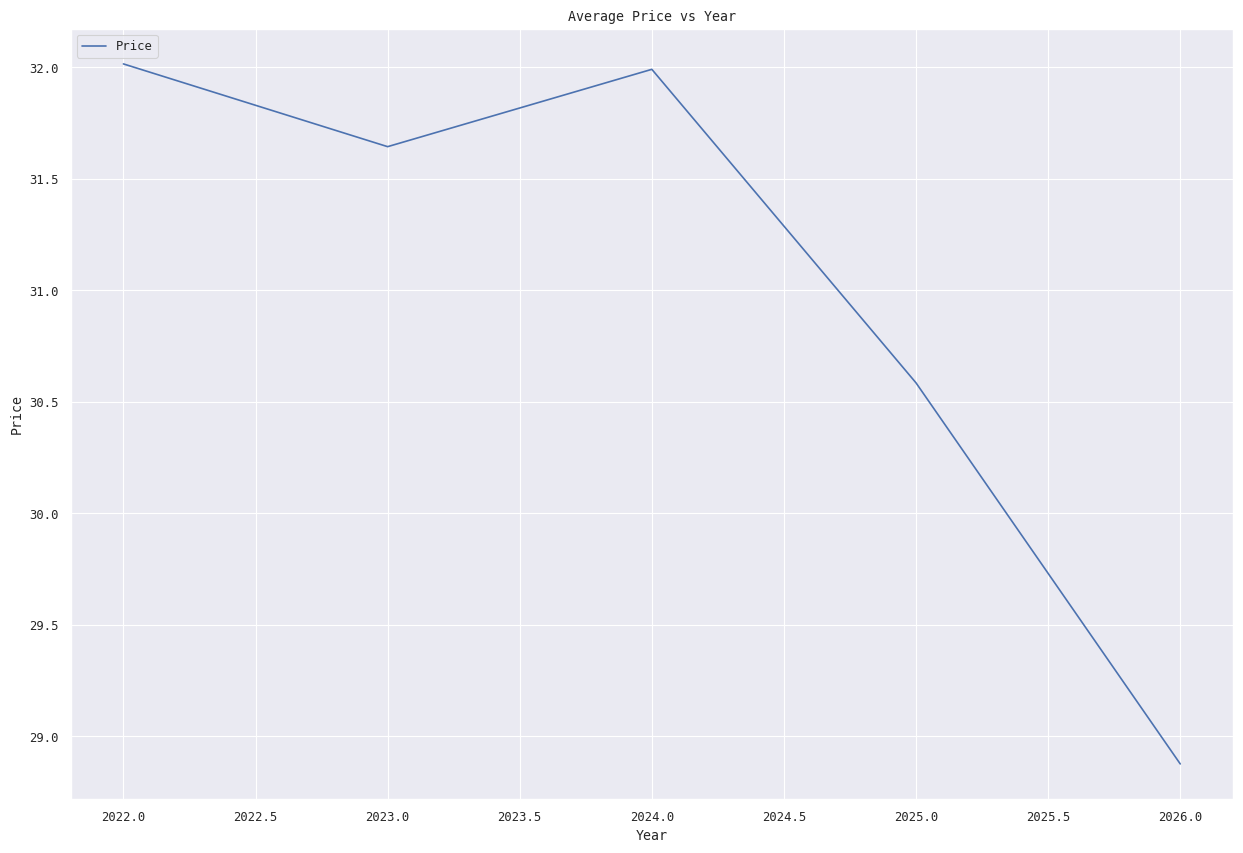

In [18]:
# Trend of price by the year
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(Customer_Transactions_Year.index, Customer_Transactions_Year.Price, label='Price')
ax.legend(loc = 'upper left')
plt.title('Average Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [19]:
# Aggregate the numeric columns by the Month
Customer_Transactions_Month = Customer_Transactions.select_dtypes(include=np.number).groupby(['Month']).mean()
Customer_Transactions_Month.head()

,Zip,Transaction_ID,Price,Discount,Year,Day
Month,,,,,,
1,53608.318102,5.004290e+11,36.363218,3.188817,2022.512568,16.101067
2,53754.880884,4.984044e+11,36.363296,3.183572,2022.507031,14.609293
3,53020.212423,4.997056e+11,33.988540,2.646808,2022.497888,15.892642
4,53077.981477,5.001395e+11,30.322871,2.663400,2022.502863,15.607637
5,53170.398266,4.978281e+11,30.311071,2.667846,2022.499157,15.933549


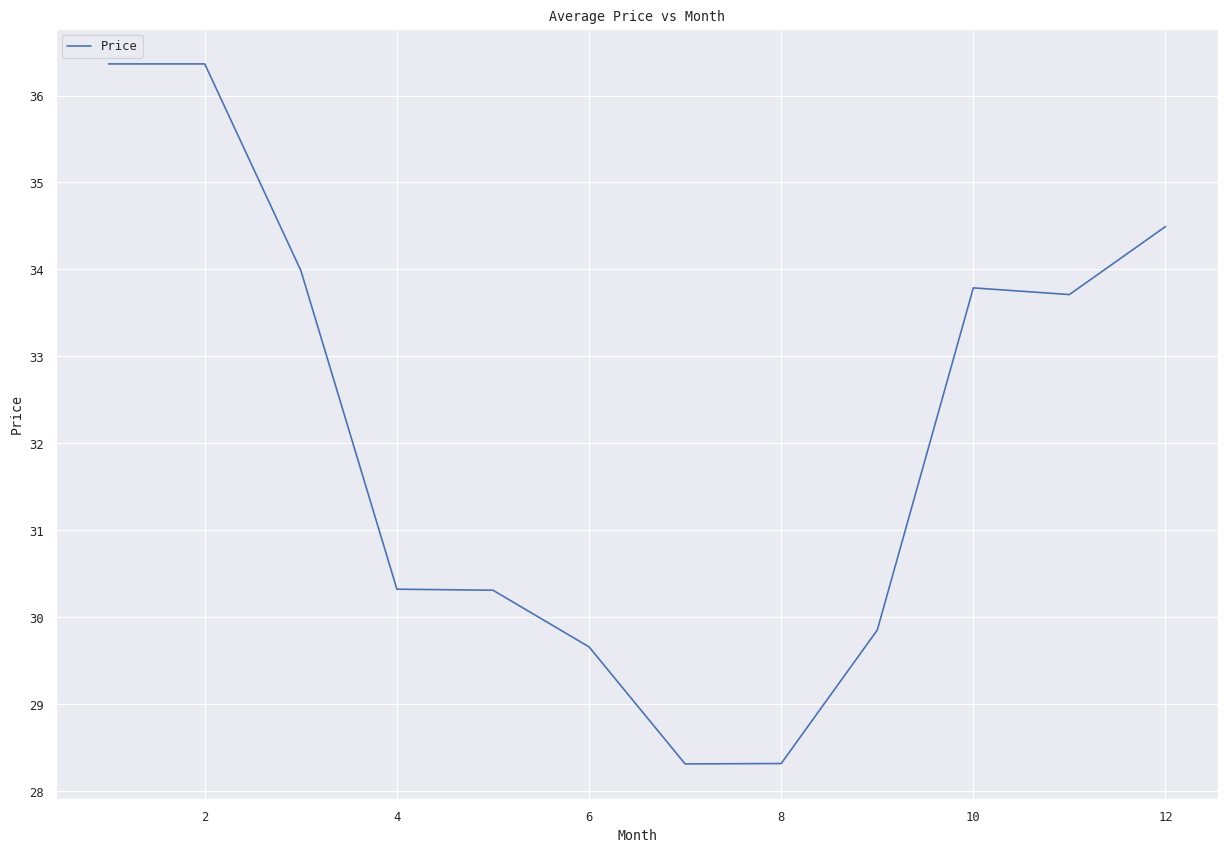

In [20]:
# Trend of price by the month
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(Customer_Transactions_Month.index, Customer_Transactions_Month.Price, label='Price')
ax.legend(loc = 'upper left')
plt.title('Average Price vs Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [21]:
# Aggregate the numeric columns by the Date
Customer_Transactions_Date = Customer_Transactions.select_dtypes(include=np.number).groupby(['Day']).mean()
Customer_Transactions_Date.head()

,Zip,Transaction_ID,Price,Discount,Year,Month
Day,,,,,,
1,53483.308852,5.058913e+11,31.983180,3.196173,2022.457533,6.056415
2,52607.873613,5.036121e+11,32.010645,NaN,2022.431172,6.147826
3,52457.426051,4.934123e+11,31.921220,NaN,2022.439228,5.926390
4,52946.664296,4.981933e+11,32.018781,2.663400,2022.457605,6.050363
5,52952.913373,5.000928e+11,32.022142,2.667948,2022.419396,5.989081


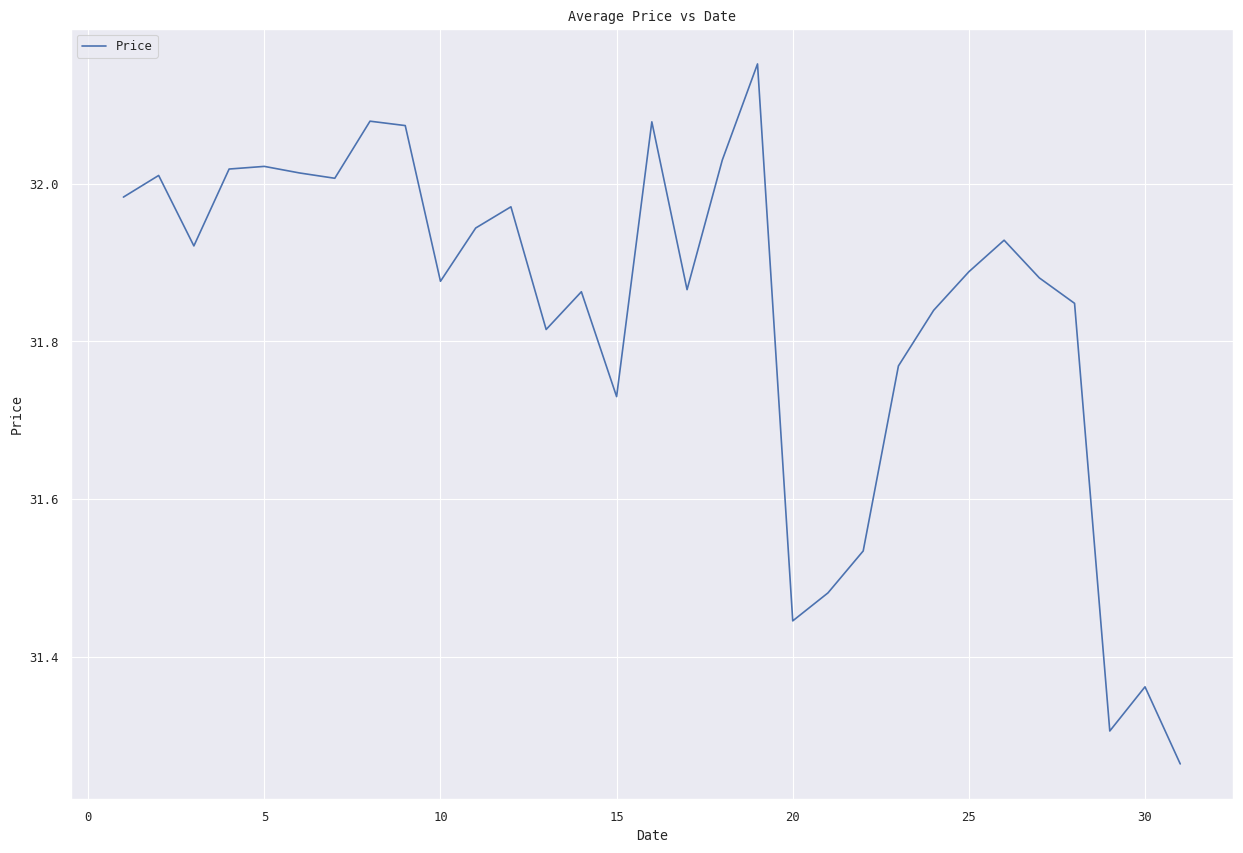

In [22]:
# Trend of price by the date
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(Customer_Transactions_Date.index, Customer_Transactions_Date.Price, label='Price')
ax.legend(loc = 'upper left')
plt.title('Average Price vs Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Summary:

After loading the Customer_Transactions table, the descriptive statistics, data structure and type, and the percentage of missing values was evaluated. Although the address-related variables had ~23% missing and the discount had ~95% missing, the null values were not dropped because it would remove all the other observations for the other variables. The numeric data did not provide any useful graphs. Customers were evaluated using the categorical variabls, and the price they paid over time. It provided some insights, as listed below.  

- The unique customers were normally distributed between all the US states.
- The unique customers were normally distributed between male and female gender.
- There were twice as many unique customers buying bottoms when compared to tops and shirts. It makes sense since the number of bottoms should be close to adding the two upperwear items.
- The number of unique customers were skewed for SKU as the counts for items were distorted.
- The average prices of the products had non-uniform changes according to the date.
    - The price decreased tremendously after 2024.
    - It appeared to be higher during the winter as compared to the summer.
    - The pattern for the date of the month appears volatile, but it was generally around 32 with slightly decreasing towards the end of the month. 
    

Further analysis was performed on Tableau.

Saving a Log file of this run for future reference or checking.

In [23]:
functions.save_notebook()
current_file = 'EDA_AP.ipynb'
output_file = 'EDA_AP.html'
functions.output_HTML(current_file, output_file)

### EDA Completed